<a href="https://colab.research.google.com/github/nuraishasb/sentiment-analysis/blob/main/R_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **MOVIE REVIEW DATASET**

We will be using a dataset of movie reviews. The movies corpus has an attribute `sentiment` that labels each text as either `pos` or `neg` according to the original imdb.com archived newspaper review star rating.

In [3]:
#install packages
install.packages("quanteda")
library(quanteda)

install.packages("quanteda.textmodels")
library(quanteda.textmodels)

install.packages('quanteda.textplots')
library(quanteda.textplots)

install.packages('caret')
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘ISOcodes’, ‘fastmatch’, ‘SnowballC’, ‘stopwords’, ‘RcppArmadillo’


Package version: 4.0.2
Unicode version: 14.0
ICU version: 70.1

Parallel computing: 2 of 2 threads used.

See https://quanteda.io for tutorials and examples.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘RcppEigen’, ‘glmnet’, ‘LiblineaR’, ‘RSpectra’, ‘SparseM’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘extrafontdb’, ‘Rttf2pt1’, ‘statnet.common’, ‘extrafont’, ‘ggrepel’, ‘sna’, ‘igraph’, ‘network’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, 

### **importing & inspecting data**

In [4]:
#data
moviereviews <- quanteda.textmodels::data_corpus_moviereviews

#docvars returns a dataframe of the document-level variables
head(docvars(moviereviews))

,sentiment,id1,id2
,<fct>,<chr>,<chr>
1,neg,cv000,29416
2,neg,cv001,19502
3,neg,cv002,17424
4,neg,cv003,12683
5,neg,cv004,12641
6,neg,cv005,29357


In [8]:
head(moviereviews, n = 3)

Corpus consisting of 3 documents and 3 docvars.
cv000_29416.txt :
"plot : two teen couples go to a church party , drink and the..."

cv001_19502.txt :
"the happy bastard's quick movie review  damn that y2k bug . ..."

cv002_17424.txt :
"it is movies like these that make a jaded movie viewer thank..."

In [6]:
#counting sentiments
table(docvars(moviereviews)$sentiment)


 neg  pos 
1000 1000 

In [7]:
summary(docvars(moviereviews))

 sentiment      id1                id2           
 neg:1000   Length:2000        Length:2000       
 pos:1000   Class :character   Class :character  
            Mode  :character   Mode  :character  

### **tokenizing corpus**

In [10]:
set.seed(13)
#creating training sample
train <- sample(c(TRUE, FALSE), 2000, replace = TRUE, prob = c(.75, .25))
#splitting data
movies_train_corpus <- moviereviews[train]
movies_test_corpus <- moviereviews[!train]

In [11]:
#removing punctuation, numbers and symbols
movies_train_tokens <- tokens(movies_train_corpus,
                              remove_punct = TRUE,
                              remove_numbers = TRUE,
                              remove_symbols = TRUE)

movies_test_tokens <- tokens(movies_test_corpus,
                             remove_punct = TRUE,
                             remove_numbers = TRUE,
                             remove_symbols = TRUE)

#removing stopwords
movies_train_dfm <- dfm(movies_train_tokens) %>%
  dfm_remove(pattern = stopwords("en")) %>%
  dfm_trim(min_termfreq = 10)

movies_test_dfm <- dfm(movies_test_tokens)
movies_test_dfm <- dfm_match(movies_test_dfm, features = featnames(movies_train_dfm))

### **multinomial naive bayes**

In [12]:
#train the Naive Bayes classifier
movie_nb <- textmodel_nb(movies_train_dfm, movies_train_dfm$sentiment)

In [13]:
#words most strongly associated with pos sentiment according to the model
head(sort(movie_nb$param[2,], decreasing = TRUE), 40)

 #words most strongly associated with neg sentiment according to the model
head(sort(movie_nb$param[1,], decreasing = TRUE), 40)

film         one       movie        like        just       story 
0.015074546 0.009074410 0.007552114 0.005287752 0.004312465 0.003943552 
       also        good        even        time         can        much 
0.003756975 0.003752735 0.003672168 0.003672168 0.003634004 0.003231168 
 characters   character        well        life       first         two 
0.003222688 0.003171803 0.003112438 0.003002188 0.002972505 0.002874977 
        see         way       films         get        many        best 
0.002870736 0.002832573 0.002824092 0.002747765 0.002518785 0.002510304 
     little      people       great      really        make       never 
0.002438218 0.002417016 0.002417016 0.002395814 0.002370372 0.002340689 
        new         man        love       scene      movies      scenes 
0.002251641 0.002192276 0.002158353 0.002145632 0.002026901 0.001984497 
       plot       world        know       makes 
0.001853045 0.001836084 0.001819122 0.001806401

film       movie         one        like        just        even 
0.013908982 0.010648047 0.009043164 0.006456745 0.005470556 0.004814648 
       good        time         get         can         bad        much 
0.004075006 0.003842414 0.003767985 0.003660993 0.003572608 0.003521438 
  character       story         two  characters        plot        make 
0.003177202 0.003153943 0.003126032 0.003102773 0.002991129 0.002991129 
      first        also      really         see         way        well 
0.002758537 0.002665501 0.002637590 0.002609679 0.002595723 0.002470124 
     little       scene      people       never        know    director 
0.002456168 0.002404998 0.002325917 0.002284050 0.002246836 0.002209621 
     scenes       films         man      action        made      movies 
0.002149147 0.002125888 0.002042155 0.001995637 0.001935163 0.001930511 
    another         new          go         big 
0.001897948 0.001883993 0.001865385 0.001856082

In [14]:
#confusion matrix
movie_test_predicted_class <- predict(movie_nb, newdata = movies_test_dfm)
movie_confusion <- table(movie_test_predicted_class, movies_test_dfm$sentiment)
movie_confusion

##accuracy
mean(movie_test_predicted_class == movies_test_dfm$sentiment)

                          
movie_test_predicted_class neg pos
                       neg 207  44
                       pos  46 214

[1] 0.8238748

In [15]:
movie_confusion_statistics <- confusionMatrix(movie_confusion, positive = "pos")
movie_confusion_statistics

Confusion Matrix and Statistics

                          
movie_test_predicted_class neg pos
                       neg 207  44
                       pos  46 214
                                         
               Accuracy : 0.8239         
                 95% CI : (0.788, 0.8559)
    No Information Rate : 0.5049         
    P-Value [Acc > NIR] : <2e-16         
                                         
                  Kappa : 0.6477         
                                         
 Mcnemar's Test P-Value : 0.9161         
                                         
            Sensitivity : 0.8295         
            Specificity : 0.8182         
         Pos Pred Value : 0.8231         
         Neg Pred Value : 0.8247         
             Prevalence : 0.5049         
         Detection Rate : 0.4188         
   Detection Prevalence : 0.5088         
      Balanced Accuracy : 0.8238         
                                         
       'Positive' Class : pos        

### **wordscores**
wordscores is a method used to analyze and understand the content of texts. it helps to find out where a text stands on a certain issue or spectrum by looking at the words it uses.

In [16]:
#creating new var
movies_train_dfm$refscore <- ifelse(movies_train_dfm$sentiment == "pos", 1, -1)

#estimating wordscores
wordscore_model <- textmodel_wordscores(movies_train_dfm, movies_train_dfm$refscore)

#predicts word scores in the test set and stores these scores in a new variable wordscores in movies_test_dfm
movies_test_dfm$wordscores <- predict(wordscore_model, movies_test_dfm)

#inspect
str(docvars(movies_test_dfm))

#compare the distribution of wordscores
boxplot(movies_test_dfm$wordscores ~ movies_test_dfm$sentiment, ylab = "Raw wordscore")

In [18]:
movies_test_dfm$wordscores <- predict(wordscore_model, movies_test_dfm)

In [19]:
str(docvars(movies_test_dfm))

'data.frame':	511 obs. of  4 variables:
 $ sentiment : Factor w/ 2 levels "neg","pos": 1 1 1 1 1 1 1 1 1 1 ...
 $ id1       : chr  "cv004" "cv007" "cv008" "cv011" ...
 $ id2       : chr  "12641" "4992" "29326" "13044" ...
 $ wordscores: 'predict.textmodel_wordscores' num  -0.01885 -0.08314 0.01874 0.00263 -0.04413 ...


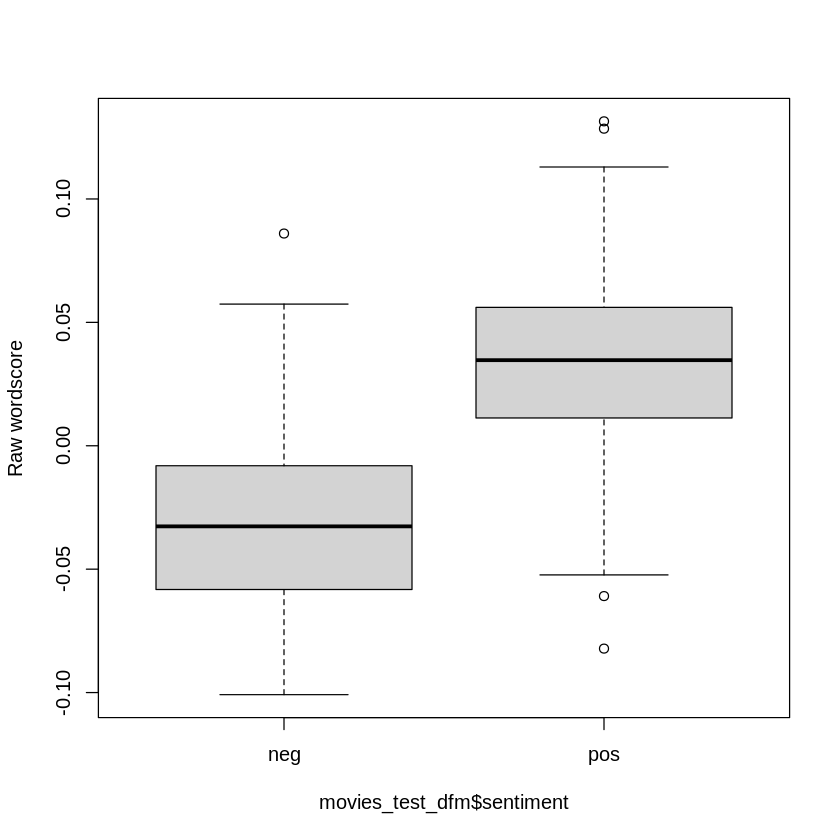

In [20]:
#compare the distribution of wordscores
boxplot(movies_test_dfm$wordscores ~ movies_test_dfm$sentiment, ylab = "Raw wordscore")

The wordscore model generally assigns lower scores to negative reviews and higher scores to positive reviews. This confirms that the model can effectively differentiate between positive and negative sentiments based on the words used in the reviews.

### **IRISH BUDGET DATASET**

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘coda’, ‘extrafontdb’, ‘Rttf2pt1’, ‘statnet.common’, ‘extrafont’, ‘ggrepel’, ‘sna’, ‘igraph’, ‘network’




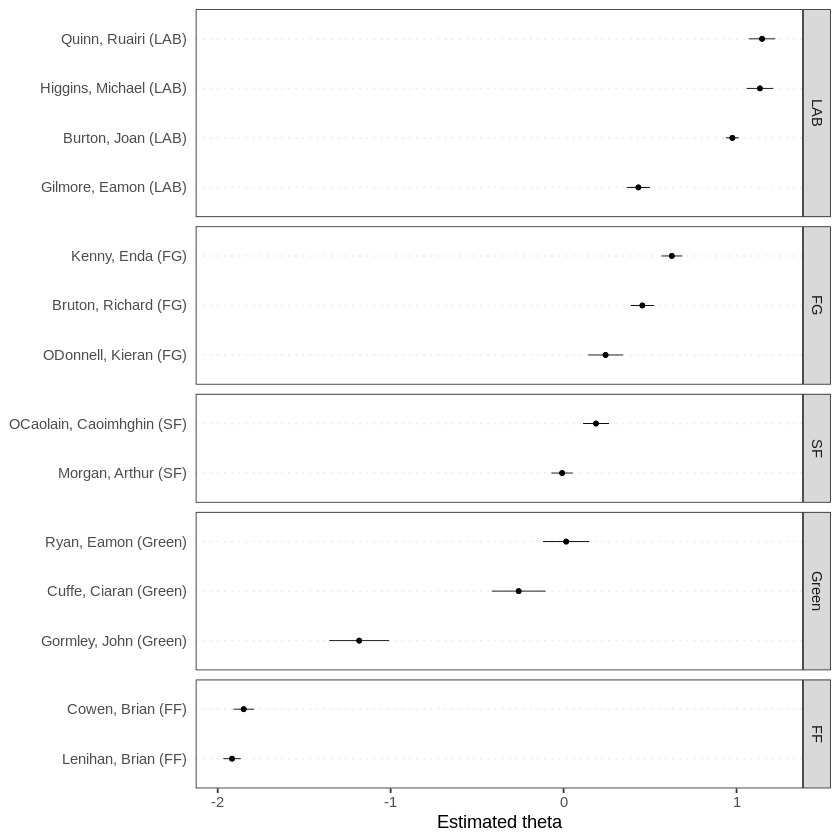

In [20]:
#tokenizing the text and stemming words
irish_tokens <- tokens(data_corpus_irishbudget2010, remove_punct = TRUE) %>%
  tokens_wordstem()

#document-feature matrix
irish_dfm <- dfm(irish_tokens) %>%
  dfm_remove(pattern = stopwords("en"))

#creating a wordfish model
#helps to uncover the underlying themes or positions that differentiate the texts
wordfish_model <- textmodel_wordfish(irish_dfm)

textplot_scale1d(wordfish_model, groups = data_corpus_irishbudget2010$party)

The plot visually separates the speeches or texts by their estimated ideological positions. Parties are distinctly grouped, showing that members of the same party have similar positions. The further apart the points are on the horizontal axis, the more different their ideological positions are.

\
For example, the points for Labour Party members (Quinn, Higgins, Burton, and Gilmore) are all positioned towards the right end of the spectrum. This suggests that their speeches or texts are similar in ideological position and clustered on one end of the latent dimension. Fianna Fáil members (Cowen and Lenihan) are positioned on the left end of the spectrum, indicating another distinct ideological position.

In [22]:
#extracting the most discriminating words at each end of the dimension
head(wordfish_model$features[order(wordfish_model$beta, decreasing = T)])

head(wordfish_model$features[order(wordfish_model$beta, decreasing = F)])

[1] "citizenship" "screw"       "phrase"      "precis"      "internat"   
[6] "passport"

[1] "innov"      "summari"    "boost"      "day-to-day" "particip"  
[6] "enhanc"

still hard to know what this dimension "means" in any real sense :(

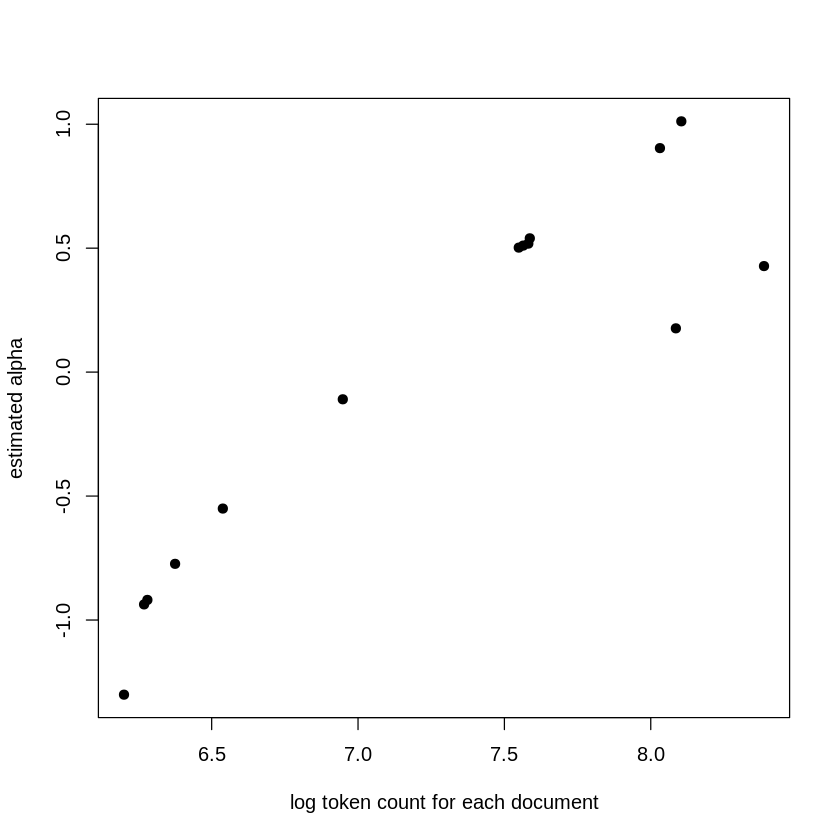

In [23]:
#scatter plot to visualize the r/s between the log of the token count for each document & the estimated alpha values from the Wordfish model
plot(x = log(ntoken(irish_dfm)),
     y = wordfish_model$alpha, pch = 19,
     xlab="log token count for each document",
     ylab="estimated alpha")

This scatter plot confirms that there is a positive relationship between the length of the documents (log token count) and the baseline level of word usage (estimated alpha). Longer documents tend to have higher baseline word usage.

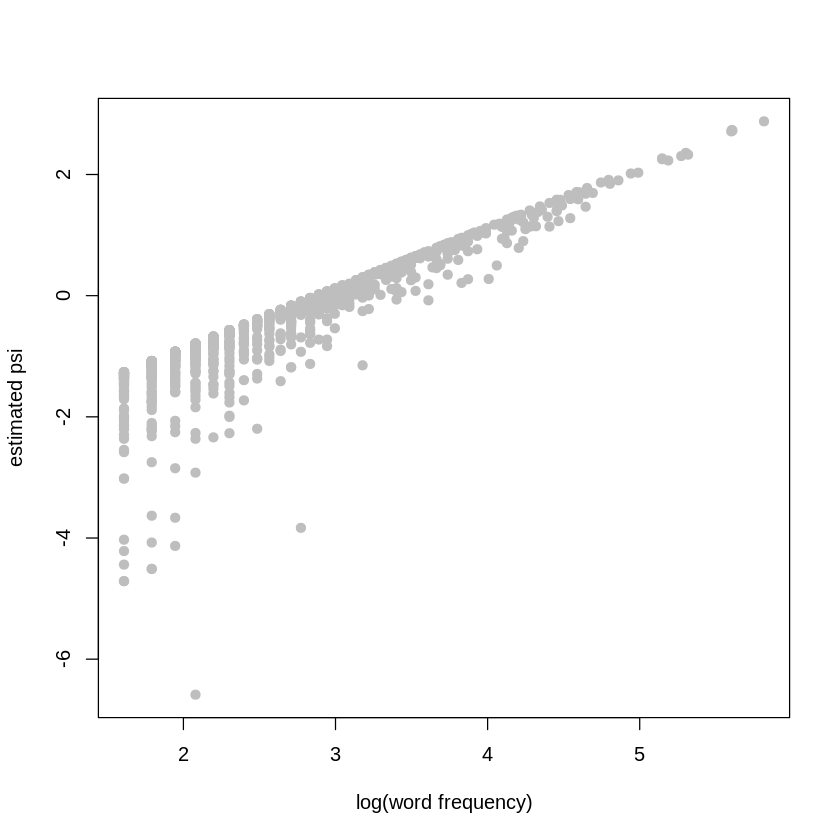

In [24]:
#visualize the relationship between the log of word frequencies and the estimated psi values

#finding top 1,000 words
top1000 <- topfeatures(irish_dfm, n=1000)
top1000 <- data.frame(word = names(top1000),
                      freq = as.numeric(top1000),
                    stringsAsFactors = FALSE)

#extracting the estimated psi parameters
df <- data.frame(
  word = wordfish_model$features,
  psi_hat = wordfish_model$psi,
  stringsAsFactors=FALSE
)

#merge the word counts with the estimated word-level coefficients
df <- merge(df, top1000)

#plot the result
plot(
  x = log(df$freq),
  y = df$psi_hat,
  pch = 19, col = "gray",
  xlab = "log(word frequency)",
  ylab = "estimated psi"
)

The psi value for a word quantifies the extent to which that word helps to distinguish between different positions on the latent dimension. Higher absolute values indicate that the word is more strongly associated with the latent dimension, making it more discriminative.

There is a positive correlation between word frequency and psi values, suggesting that more frequent words tend to have higher psi values.